<a href="https://colab.research.google.com/github/nadiyans/rockpaperscissors/blob/main/Final%20Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-24 19:41:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.91MB/s    in 63s     

2020-06-24 19:42:20 (4.89 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [ ]:
pip install split_folders

In [ ]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/data', seed=1337, ratio=(.8,.2))
folder='/tmp/rockpaperscissors/data'
train_dir=os.path.join(folder, 'train')
validation_dir=os.path.join(folder, 'val')

Copying files: 2188 files [00:00, 3772.06 files/s]


In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'wrap')
 
test_datagen = ImageDataGenerator(
               rescale=1./255,
               rotation_range=20,
               horizontal_flip=True,
               shear_range = 0.2,
               fill_mode = 'wrap')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 200),
        batch_size=8,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 200),
        batch_size=8,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=40,
      verbose=1)

Epoch 1/10
8/8 [==============================] - 22s 3s/step - loss: 0.2115 - accuracy: 0.9062 - val_loss: 0.2566 - val_accuracy: 0.9125
Epoch 2/10
8/8 [==============================] - 22s 3s/step - loss: 0.3025 - accuracy: 0.8594 - val_loss: 0.3087 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 22s 3s/step - loss: 0.1797 - accuracy: 0.9531 - val_loss: 0.2700 - val_accuracy: 0.9187
Epoch 4/10
8/8 [==============================] - 22s 3s/step - loss: 0.2043 - accuracy: 0.9219 - val_loss: 0.3188 - val_accuracy: 0.8875
Epoch 5/10
8/8 [==============================] - 22s 3s/step - loss: 0.0900 - accuracy: 0.9531 - val_loss: 0.2475 - val_accuracy: 0.9187
Epoch 6/10
8/8 [==============================] - 22s 3s/step - loss: 0.1455 - accuracy: 0.9844 - val_loss: 0.3412 - val_accuracy: 0.9000
Epoch 7/10
8/8 [==============================] - 22s 3s/step - loss: 0.1081 - accuracy: 0.9688 - val_loss: 0.2391 - val_accuracy: 0.9031
Epoch 8/10
8/8 [==================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 1MMkSW3f1CAsw03q.png to 1MMkSW3f1CAsw03q (3).png
1MMkSW3f1CAsw03q.png
scissors


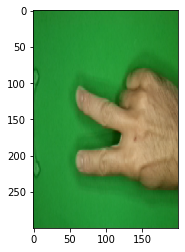

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(300,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  
print(fn)
if classes[0][0]==1:
  print('paper')
elif classes[0][1]==1:
  print('rock')
elif classes[0][2]==1:
  print('scissors')